In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("digit_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label = df.pop("label")
pixels = df
X_train, X_test, y_train, y_test = train_test_split(pixels,label)

In [4]:
trainscores = []
testscores = []
for i in range(1,5):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        trainscores.append(neigh.score(X_train,y_train))
        testscores.append(neigh.score(X_test,y_test))

In [5]:
print(trainscores)
print(testscores)

[1.0, 0.9812698412698413, 0.9820634920634921, 0.9776190476190476]
[0.9637142857142857, 0.958, 0.9658095238095238, 0.9642857142857143]


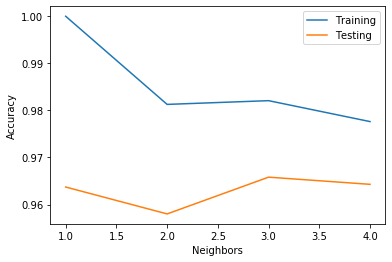

In [16]:
ax = plt.subplot()
plt.plot(range(1,5),trainscores)
plt.plot(range(1,5),testscores)
ax.set_xlabel("Neighbors");ax.set_ylabel("Accuracy"); 
plt.legend(["Training", "Testing"])

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
prediction = neigh.predict(X_test)

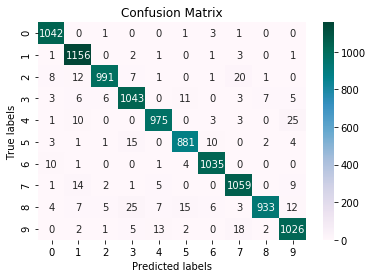

In [9]:
ax = plt.subplot()
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); 
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 

In [17]:
dftest = pd.read_csv("digit_test.csv")
dftest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dfsub = pd.DataFrame()
dfsub["label"] = neigh.predict(dftest)
dfsub

,label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [27]:
dfsub["ImageID"] = dfsub.index +1
dfsub

,label,ImageID
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5
...,...,...
27995,9,27996
27996,7,27997
27997,3,27998
27998,9,27999


In [28]:
dfsub.to_csv("digitsub.csv", index = False)